## Google Page Rank Algorithm
Kernel-SageMath

Consider a internet network consisting of five pages which are linked with each other according to the following scheme (an arrow from page A to page B indicates a link from page A to page B):

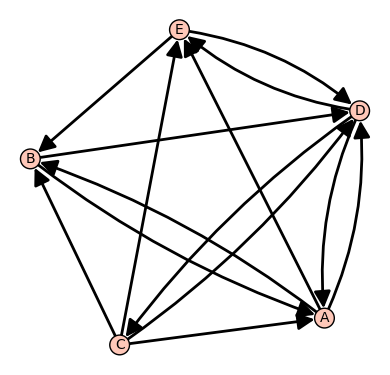

In [1]:
G = DiGraph({1:[2,4,5],2:[1,4],3:[1,2,4,5],4:[1,3,5],5:[2,4]})
G.relabel({1:'A',2:'B',3:'C',4:'D',5:'E'})
show(G,figure=2)

Here Ad is the matrix that determines the arrows between the websites. For example, the first row
of the matrix contains 1 at the entries 2, 3 and 4, because website A has incoming links from B,
C and D. In other words, the i-th row tells us incoming links to i, where as j-th column tells us
outgoing links from j. Such a matrix is called an adjacency matrix of this network.

In [2]:
Ad = G.adjacency_matrix().T
Ad

[0 1 1 1 0]
[1 0 1 0 1]
[0 0 0 1 0]
[1 1 1 0 1]
[1 0 1 1 0]

In [3]:
##Importance of each node
[sum(Ad.rows()[i]) for i in range(5)]

[3, 3, 1, 4, 3]

The outcome suggests that the page D is most important and C is the least important.
The basic approach presented in the above example does not take into account a few important
factors:

• link from an important page should matter more than a link from a mediocre page;

• not all the websites are connected with each other via links, in fact the actual web comprises
a highly disconnected graph; how to compare such pages?

• is there always a unique most important website?

• some pages do not contain any outgoing links (such pages are called dangling nodes).

Importance of Webpage

$x_i$ ,the importance score of the web page i

$n_i$,the number outgoing links from the page i.

In the example, the score of page A would be determined by the relation

$x_1 = x_2 + x_3 + x_4$
However, in this way the page D may vote three times. To avoid such a situation, we normalise
the vote by the the number of links that the page contains, i.e. the score of page A should be
rather given by a formula
$x_1 = \dfrac{x_2}{2} + \dfrac{x_3}{4} + \dfrac{x_4}{3}$ 




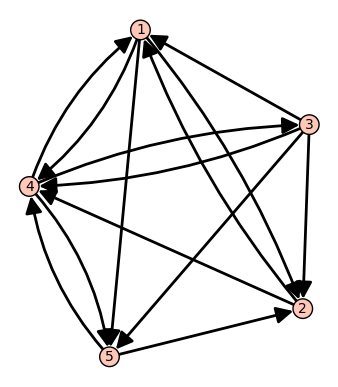

In [4]:
G = DiGraph({1:[2,4,5],2:[1,4],3:[1,2,4,5],4:[1,3,5],5:[2,4]})
show(G,figsize=3)

In [6]:
H = G.adjacency_matrix().T
H

[0 1 1 1 0]
[1 0 1 0 1]
[0 0 0 1 0]
[1 1 1 0 1]
[1 0 1 1 0]

In [7]:
n=5
print('Probability matrix or Transition Matrix P: ')
P=column_matrix([H.columns()[i]/max(sum(H.columns()[i]),1) for i in range(n)])
print(P)
## P is a stochastic matrix

Probability matrix or Transition Matrix P: 
[  0 1/2 1/4 1/3   0]
[1/3   0 1/4   0 1/2]
[  0   0   0 1/3   0]
[1/3 1/2 1/4   0 1/2]
[1/3   0 1/4 1/3   0]


In [8]:
## Starting website of a surfer
v = vector([0,1,0,0,0])
P*v

(1/2, 0, 0, 1/2, 0)

In [9]:
P*(P*v)

(1/6, 1/6, 1/6, 1/6, 1/3)

In [10]:
k=1000
P^k*v.n(digits=6)

(0.219512, 0.195122, 0.0975610, 0.292683, 0.195122)

In [11]:
(P^1000).change_ring(RDF)

[0.21951219512195122 0.21951219512195122 0.21951219512195122 0.21951219512195122 0.21951219512195122]
[ 0.1951219512195122  0.1951219512195122  0.1951219512195122  0.1951219512195122  0.1951219512195122]
[ 0.0975609756097561  0.0975609756097561  0.0975609756097561  0.0975609756097561  0.0975609756097561]
[ 0.2926829268292683  0.2926829268292683  0.2926829268292683  0.2926829268292683  0.2926829268292683]
[ 0.1951219512195122  0.1951219512195122  0.1951219512195122  0.1951219512195122  0.1951219512195122]

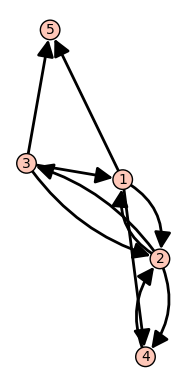

In [12]:
G = DiGraph({1: [2,4,5], 2:[1,4,3], 3:[1,2,5],4:[2]})
show(G,figsize=[2,2])

In [14]:
H = G.adjacency_matrix().H
P=column_matrix([H.columns()[i]/max(sum(H.columns()[i]),1) for i in range(n)])
show(P)

[  0 1/3 1/3   0   0]
[1/3   0 1/3   1   0]
[  0 1/3   0   0   0]
[1/3 1/3   0   0   0]
[1/3   0 1/3   0   0]

In [13]:
v=vector([0,0,1,0,0])
k=1000
P^k*v.n(digits=6)

(0.219512, 0.195122, 0.0975610, 0.292683, 0.195122)

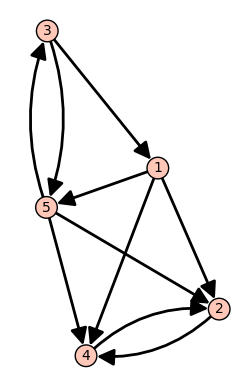

In [14]:
G = DiGraph({1: [2,4,5], 2:[4], 3:[1,5],4:[2],5:[2,3,4]})
show(G,figsize=4)

In [15]:
H = G.adjacency_matrix().T
P=column_matrix([H.columns()[i]/max(sum(H.columns()[i]),1) for i in range(n)])
print(P)

[  0   0 1/2   0   0]
[1/3   0   0   1 1/3]
[  0   0   0   0 1/3]
[1/3   1   0   0 1/3]
[1/3   0 1/2   0   0]


In [18]:
v=vector([1,0,0,0,0])
k=10000
P^k*v.n(digits=6)

(9.71663e-2821, 0.500000, 1.01537e-2820, 0.500000, 1.59156e-2820)

In [16]:
S=1/n*matrix([[1]*n]*n) # ones_matrix(QQ,n)/n
print(S)

[1/5 1/5 1/5 1/5 1/5]
[1/5 1/5 1/5 1/5 1/5]
[1/5 1/5 1/5 1/5 1/5]
[1/5 1/5 1/5 1/5 1/5]
[1/5 1/5 1/5 1/5 1/5]


### How to handle dangling nodes and loops?
Assume that a web network consists of n pages. Let S be an n × n matrix with all entries equal to
$1/n$. We replace the probability matrix P attached to this netwrok
G = αP + (1 − α)S.

Here α is called the damping factor which tells us how much times a surfer follow the hyperlink
that teleporting.

In [17]:
print("The Google Matrix of the associated network is given by")
alpha=0.85 # Damping factor
G = alpha*P+(1-alpha)*S;
print(G.n(digits=4))

The Google Matrix of the associated network is given by
[0.03000 0.03000  0.4550 0.03000 0.03000]
[ 0.3133 0.03000 0.03000  0.8800  0.3133]
[0.03000 0.03000 0.03000 0.03000  0.3133]
[ 0.3133  0.8800 0.03000 0.03000  0.3133]
[ 0.3133 0.03000  0.4550 0.03000 0.03000]


In [19]:
k=1000 # No of clicks
pn = G^k*v.n(digits=6)
print('After ' +str(k)+' iteration the probability vector is: \n');
pn


After 1000 iteration the probability vector is: 



(0.0505639, 0.418080, 0.0483856, 0.418080, 0.0648903)

In [20]:
PN = flatten(pn)
sorted_nodes = []
for i in range(n):
    sorted_nodes.append([PN[i],i])
sorted_nodes.sort(reverse=True)
print(table(sorted_nodes,header_row=['Rank','Page no.']))

  Rank        Page no.
+-----------+----------+
  0.418080    3
  0.418080    1
  0.0648903   4
  0.0505639   0
  0.0483856   2


### Random Networks

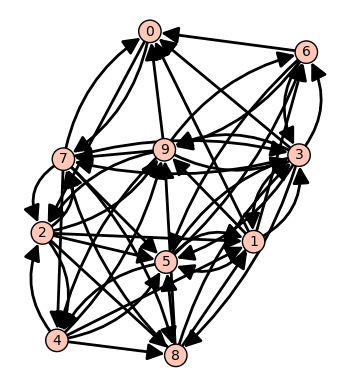

In [21]:
n = 10 # Number of webpages/nodes
N = 50 # Total number of links
D = digraphs.RandomDirectedGNM(n,N)
D.show(figsize=6)

In [22]:
H=D.adjacency_matrix()
H=H.T
P=column_matrix([H.columns()[i]/max(sum(H.columns()[i]),1) for i in range(n)])
S=1/n*matrix([[1]*n]*n)
alpha=0.85
G = alpha*P+(1-alpha)*S;

In [23]:
starting_site = randint(0,n-1)
v = vector([0]*n)
for i in range(n):
    if i==starting_site: v[i]=1
v

(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)

In [24]:
k=100 # No of clicks
pn = G^k*v.n(digits=6)
print('After ' +str(k)+' iteration the probability vector is: \n');
pn

After 100 iteration the probability vector is: 



(0.0953386, 0.0969859, 0.101043, 0.119380, 0.0861052, 0.121902, 0.0869099, 0.111985, 0.0743130, 0.106038)

In [25]:
k=1000 # No of clicks
pn = G^k*v.n(digits=6)
print('After ' +str(k)+' iteration the probability vector is: \n');
pn

After 1000 iteration the probability vector is: 



(0.0953386, 0.0969859, 0.101043, 0.119380, 0.0861052, 0.121902, 0.0869099, 0.111985, 0.0743130, 0.106038)

In [26]:
PN = flatten(pn)
sorted_nodes = []
for i in range(n):
    sorted_nodes.append([PN[i],i])
sorted_nodes.sort(reverse=True)
print(table(sorted_nodes,header_row=['Rank','Page no.']))

  Rank        Page no.
+-----------+----------+
  0.121902    5
  0.119380    3
  0.111985    7
  0.106038    9
  0.101043    2
  0.0969859   1
  0.0953386   0
  0.0869099   6
  0.0861052   4
  0.0743130   8
